In [1]:
from IPython.core.display import HTML

HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Grundlagen künstlicher Intelligenz
<br><br>
Sommersemester 2019
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Neural Networks"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Freitag, 13.07.2019 (23:55 Uhr)</i>
</div>

# Präsenzübung

Benötigt für diese Übung:
* keras
* tensorflow/theano

<div class="task_description">
    <i class="task">Task 9.1:</i> <br>
</div>


a) Warum und wofür werden Neural Networks verwendet? (*Why and what are Neural Networks used for?*)

<strong style="color: blue">Lösung:</strong>

* Inspiration am Aufbau des Gehirns?
* Processing images, Processing sequences, Generating data
* detecting patterns in data: automate the feature development, start with very basic low-level representations & identify relevant patterns in the data

b) Wie ist der grundlegende Aufbau eines Neural Networks? (*What is the basic structure of a Neural Network?*)

<strong style="color: blue">Lösung:</strong>

Aufbau eines Neurons:
* Bias b
* Input x (determined by data)
* Parameters: w (learned by our model)
* Activation function: σ (can be varied)
* Output: σ(w • x)

Aufbau des Netzes:
* Schichten aus Neuronen (Input, Hidden, Output)
* Verbindungen zwischen den Schichten

c) Wie wird der Output dieses Neurons berechnet? Als Aktivierungsfunktion verwenden wir ReLu (Rectified Linear Units, y = max(0, x)) <br>

*How is the output of this neuron calculated? We use ReLu (Rectified Linear Units, y = max(0, x)) as the activation function.*

![Neuron](img/neuron.png)


<strong style="color: blue">Lösung:</strong>

$ ŷ = σ(w_1*x_1 + w_2*x_2 + w_3*x_3 + b) $ <br>
$ ŷ = σ(0.8*1 + 0.4*5 + 0.5*3 + 1*0.4) $<br>
$ ŷ = σ(4.7) $<br>
$ ŷ = max(0, (4.7)) $<br>
$ ŷ = 4.7 $

<div class="task_description">
    <i class="task">Task 9.2:</i> <br>
    
Die automatische Erkennung von handgeschriebenen Zahlen ist eine wichtige Anwendung z.B. für das automatische
Sortieren von Briefen nach der Postleitzahl. Der bekannteste Datensatz für dieses Problem ist der sogenannte MNIST Datensatz (http://yann.lecun.com/exdb/mnist/). <br><br>
Er enthält 60000 Bilder mit handgeschriebenen Zahlen. Jedes Bild wird als ein Vektor von Pixeln repräsentiert. Der Wert ist dabei die Farbe des Pixels (0 = weiß, 255 = schwarz).
Das Ziel ist es, auf jedem Bild automatisch die dazugehörige Zahl zu identifizieren. Für diesen Task gibt es also zehn Klassen: Alle Zahlen von 0-9.
</div>

*The automatic recognition of handwritten numbers is an important application, e.g. for the automatic sorting of letters by postal code. The best known dataset for this problem is the so-called MNIST dataset (http://yann.lecun.com/exdb/mnist/).* <br>

*It contains 60000 pictures with handwritten numbers. Each image is represented as a vector of pixels. The value is the color of the pixel (0 = white, 255 = black).
The aim is to automatically identify the corresponding number on each image. So there are ten classes for this task: All numbers from 0-9.*

In [7]:
import numpy as np

from random import randint
from random import sample

import matplotlib
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential, load_model
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [8]:
#Load the dataset MNIST Handwritten Digits dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Inspect some examples

a) Gucken Sie sich zunächst den Datensatz noch einmal genauer an, indem Sie sich einzelne Beispiele ausgeben lassen. <br>

*First, take a closer look at the data record again by displaying individual examples.*

<strong style="color: blue">Lösung:</strong>

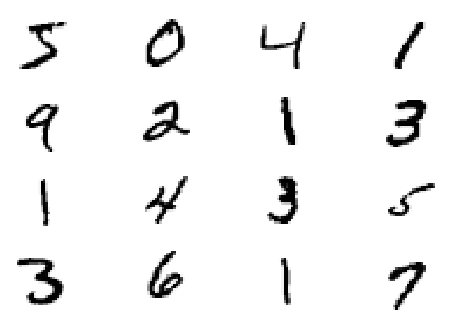

In [12]:
examples = sample(list(x_train), 16)

#Feel free to adjust this value to scale the output
plt.rcParams['figure.dpi'] = 100

for i in range(len(examples)):
    ax = plt.subplot(4, 4, i + 1)
    ax.axis('off')
    ax.imshow(x_train[i], cmap='Greys')

b) Warum empfielt es sich, für dieses Problem Machine Learning zu verwenden? Was könnten die Schwierigkeiten bei anderen Methoden sein? <br>

*Why is it a good idea to use Machine Learning for this problem? What might be the difficulties with other methods?*

<strong style="color: blue">Lösung:</strong>

- Jeder Mensch hat eine eigene Handschrift, sodass die Zeichen bei jeder Person unterschiedlich aussehen.
- Man kann nicht einfach festlegen, welche Pixel schwarz genau sein müssen, damit die Ziffer zum Beispiel eine "1" darstellt (Es können immer unterschiedliche sein).
- Machine Learning Algorithmen sind in der Lage, zu lernen, was genau zum Beispiel eine "3" zu einer "3" macht.

## Prepare the data

<div class="task_description">
    <i class="task">Task 9.3:</i> <br>
    
Neuronale Netze, wie in Aufgabe 9.1. besprochen, sind sehr gut in der Lage, dieses Problem zu lösen. Im Rahmen dieser Aufgabe wollen wir neuronales Netz bauen, das handgeschriebene Ziffern erkennen kann.
</div>

*Neural networks, as discussed in Task 9.1, are very well able to solve this problem. As part of this task, we want to build a neural network that can recognize handwritten numbers.*

a) Passen Sie die Klassenvektoren (y_train und y_test) so an, dass wir sie für das neuronale Netz verwenden können. <br>

*Adjust the class vectors (y_train and y_test) so that we can use them for the neural network.*

<strong style="color: blue">Lösung:</strong>

In [11]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

# print first 5 labels as categorial and one-hot
for i in range(5):
    print(y_train[i], " -> ", y_train_one_hot[i])

5  ->  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0  ->  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4  ->  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1  ->  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9  ->  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


b) Passen Sie die Eingabedaten (x_train und x_test) so an, dass wir sie für das neuronale Netz verwenden können.

*Adjust the input data (x_train and x_test) so that we can use them for the neural network.*

In [10]:
# normalize into [0,1]
def normalize_data(x):
    x = x.astype('float32')
    x /= 255
    return x

img_rows, img_cols = 28, 28
image_size = img_rows * img_cols

# Flatten the images as we are not using CNN here
print("Original shape: ", x_train.shape)
x_train_reshaped = x_train.reshape(x_train.shape[0], image_size)
x_test_reshaped = x_test.reshape(x_test.shape[0], image_size)
print("After flattening: ", x_train_reshaped.shape)

# Normalize the pixel values
x_train_reshaped = normalize_data(x_train_reshaped)
x_test_reshaped = normalize_data(x_test_reshaped)

Original shape:  (60000, 28, 28)
After flattening:  (60000, 784)


## Evaluation

c) Gegeben sind folgende Hilfsfunktionen: (*The following help functions are given*)

Bauen Sie ein neuronales Netz, welches in der Lage ist, handgeschriebene Ziffern zu erkennen. Experimentieren Sie dabei auch mit den Parametern. Was fällt Ihnen auf?

Orientieren Sie sich dabei an der Dokumentation: https://keras.io/layers/core/

*Build a neural network capable of recognizing handwritten numbers. Experiment with the parameters as well. What do you notice?* <br>

*Use the documentation for orientation: https://keras.io/layers/core/*

In [13]:
def fit_model(model, xtrain, ytrain):
    history = model.fit(xtrain, ytrain,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=True,
                        validation_split=.1)
    return history
    
def evaluate_model(model, history, xtest, ytest):
    score = model.evaluate(xtest, ytest, verbose=False)

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
 
    print("Test loss: ", score[0])
    print("Test accuracy: ", score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 151us/step - loss: 1.5325 - acc: 0.5322 - val_loss: 0.7092 - val_acc: 0.8473
Epoch 2/5
54000/54000 [==============================] - 7s 138us/step - loss: 0.7589 - acc: 0.7742 - val_loss: 0.4263 - val_acc: 0.8963
Epoch 3/5
54000/54000 [==============================] - 8s 145us/step - loss: 0.5814 - acc: 0.8261 - val_loss: 0.3404 - val_acc: 0.9117
Epoch 4/5
54000/54000 [==============================] - 8s 142us/step - loss: 0.5000 - acc: 0.8522 - val_loss: 0.2978 - val_acc: 0.9195
Epoch 5/5
54000/54000 [==============================] - 7s 138us/step - loss: 0.4526 - acc: 0.8678 - val_loss: 0.2719 - val_acc: 0.9243


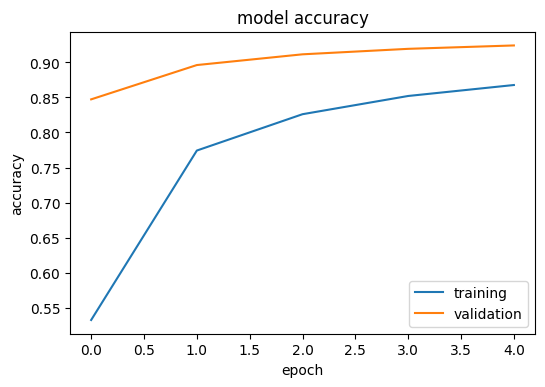

Test loss:  0.3143723938941956
Test accuracy:  0.9133


In [14]:
batch_size = 128
epochs = 5

#Your model:
model = Sequential()

#Here you can modify your model

model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#Train the neural network
history = fit_model(model, x_train_reshaped, y_train_one_hot)

#Evaluate the neural network
evaluate_model(model, history, x_test_reshaped, y_test_one_hot)

<strong style="color: blue">Lösung:</strong>

Ein mögliches Modell könnte so aussehen:

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(image_size,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

d) Wie viele Input- und Outputknoten (Nodes) gibt es? Wäre auch eine andere Zahl denkbar? <br>

*How many input and output nodes are there? Could it be a different number?*

<strong style="color: blue">Lösung:</strong>

* input 28*28 +1, 
* output: 10
* nein, Input und Output sind durch die Trainingsdaten vorgegeben

e) Wie viele Knoten sind im hidden layer vorgesehen? Wäre auch eine andere Zahl denkbar? <br>

*How many nodes are there in the hidden layer? Could it be a different number?*

<strong style="color: blue">Lösung:</strong>

abhängig vom code, ja, das muss man ausprobieren

f) Welche weiteren Parameter gibt es? <br>

*Which other parameters are there?*

<strong style="color: blue">Lösung:</strong>

* Learning Rate
* Regularization
* Anzahl und Knoten Hidden Layer
* Epsilon
* Activation Function.
* Theoretisch auch Error Function, aber die ist hier nicht als Parameter vorgesehen, sondern fix der Squared Loss (Den letzten Satz nicht zwangsläufig sagen, nur falls jemand fragt.)

g) Welche Activation Functions werden hier verwendet und welche anderen Aktivierungsfunktionen gibt es? <br>

*Which Activation Functions are used here and which other Activation Functions are there?*

<strong style="color: blue">Lösung:</strong>

* Verwendet werden ReLu & Softmax
* Weitere: Sigmoid, Tanh

h) Warum werden die Aktivierungsfunktionen im Code in dieser Reihenfolge in dieser Reihenfolge verwendet? <br>

*Why are the activation functions in the code used in this order in this order?*

<strong style="color: blue">Lösung:</strong> 

Given the cumulated weighted input, ReLu computes the output.<br>
For the last output layer, we often want to receive a probability distribution over the classes as output. To achieve this, we use the softmax as activation function for the last layer.

i) Im Code werden 'epochs'und 'batch_size' definiert. Was versteht man darunter?  <br>

*The code defines 'epochs' and 'batch_size'. What do they mean?*

<strong style="color: blue">Lösung:</strong>

epoch: hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset
batch size: total number of training examples present in a single batch, batch: dataset divided into number of Batches)

## Convolutional Neural Networks

<div class="task_description">
    <i class="task">Task 9.4:</i> <br>
</div>

Convolutional Neural Networks enthalten Schichten, in denen die Aktivität mithilfe von diskreter Faltung (Convolution) berechnet wird.<br>
*Convolutional Neural Networks contain layers in which activity is calculated using discrete convolution.*

Gegeben ist der Filter b (*Given is filter b*)

$$b = \begin{bmatrix} -1 &  1 \\ 1 & -1 \end{bmatrix}$$

und als Eingabe das Bild f (*and as input the image f*)

$$f = \begin{bmatrix} 0 & 0.1 & 0.5 \\ 0 & 0.7 & 0.2 \\ 0.9 & 0.2 & 0 \end{bmatrix}$$

a) Berechnen Sie das Ergebnis der diskreten Faltung. Verwenden Sie hierfür die Aktivierungsfunktion f mit <br>

*Calculate the result of the discrete convolution. To do this, use the activation function f with* <br>

$$f(x) = max(x, 0)$$

<strong style="color: blue">Lösung:</strong>

Rechenweg:
    
<ol>
    <li> Schritt: $$f(-1 * 0 + 1 * 0.1 + 1 * 0 -1 * 0.7) = f(-0.6) = 0 $$ </li>
    <li> Schritt: $$f(-1 * 0.1 + 1 * 0.5 + 1 * 0.7 - 1 * 0.2) = f(-0.1 + 0.5 + 0.7 - 0.2) = f(0.9) = 0.9$$ </li>
    <li> Schritt: $$f(-1 * 0 + 1 * 0.7 + 1 * 0.9 - 1 * 0.2) = f(0.7 + 0.9 - 0.2) = f(1.4) = 1.4$$ </li>
    <li> Schritt: $$f(-1 * 0.7 + 1 * 0.2 + 1 * 0.2 - 1 * 0) = f(-0.7 + 0.2 + 0.2) = f(-0.3) = 0$$ </li>
</ol>

Ergebnis:

$$\begin{bmatrix} 0 & 0.9 \\ 1.4 & 0 \end{bmatrix}$$

b) Für welches Feature könnte der Filter zuständig sein? <br>

*For which feature could the filter be responsible?*

<strong style="color: blue">Lösung:</strong>

Der Filter ist in der Lage, weiße, diagonale Linien in einem Bild zu entdecken.

c) Entwickeln sie einen Filter mit einer Höhe und Breite von 3, welcher in der Lage ist, vertikale Kanten zu entdecken.<br>

*Develop a filter with a height and width of 3 which is capable of detecting vertical edges.*

<strong style="color: blue">Lösung:</strong>

Zum Beispiel

$$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$$

oder

$$\begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}$$

d) Zusätzlich enthalten Convolutional Neural Networks sogenannte Pooling Layers. Hier werden überflüssige Informationen verworfen.<br>

Berechnen Sie die Ausgabe einer Max-Pooling-Layer für folgenden Input: <br>

*In addition, Convolutional Neural Networks contain so-called pooling layers. Here superfluous information is discarded.*<br>

*Calculate the output of a Max Pooling Layer for the following input:* <br>

$$\begin{bmatrix} 0.8 & 0.2 & 0.4 & 0.2\\ 0.9 & 0.5 & -0.4 & 0.2 \\ 0.1 & 0.1 & -0.6 & -0.4 \\ -0.2 & 0.9 & -0.3 & 0.6 \end{bmatrix}$$

<strong style="color: blue">Lösung:</strong>

$$\begin{bmatrix} 0.9 & 0.4 \\ 0.9 & 0.6 \end{bmatrix}$$

<div class="task_description">
    <i class="task">Task 9.5:</i> <br>
</div>

Im Folgenden sehen Sie, wie ein Convolutional Neural Network mithilfe von Keras implementiert werden kann.<br>

*The following shows how to implement a Convolutional Neural Network using Keras.*

(6000, 28, 28, 1)
Train on 5400 samples, validate on 600 samples
Epoch 1/5
5400/5400 [==============================] - 26s 5ms/step - loss: 1.0354 - acc: 0.6581 - val_loss: 0.3903 - val_acc: 0.8633
Epoch 2/5
5400/5400 [==============================] - 28s 5ms/step - loss: 0.3028 - acc: 0.9100 - val_loss: 0.1752 - val_acc: 0.9417
Epoch 3/5
5400/5400 [==============================] - 28s 5ms/step - loss: 0.2071 - acc: 0.9389 - val_loss: 0.1670 - val_acc: 0.9533
Epoch 4/5
5400/5400 [==============================] - 26s 5ms/step - loss: 0.1467 - acc: 0.9578 - val_loss: 0.1030 - val_acc: 0.9700
Epoch 5/5
5400/5400 [==============================] - 24s 4ms/step - loss: 0.1190 - acc: 0.9635 - val_loss: 0.1214 - val_acc: 0.9600


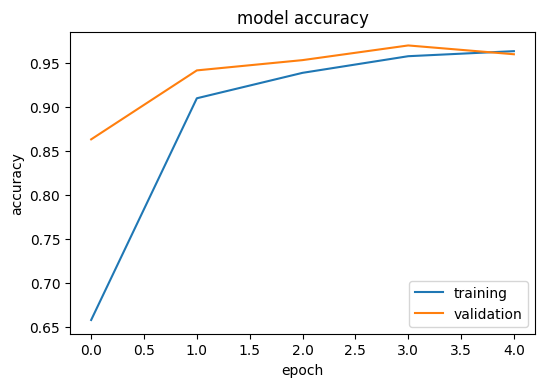

Test loss:  0.09646892418421339
Test accuracy:  0.9702


In [25]:
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

if K.image_data_format() == 'channels_first':
    x_train_reshaped = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test_reshaped = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_reshaped = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test_reshaped = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_reshaped = normalize_data(x_train_reshaped)
x_test_reshaped = normalize_data(x_test_reshaped)

# train with less data (takes too long otherwise)
x_train_small = x_train_reshaped[:6000,:]
y_train_small = y_train_one_hot[:6000,:]
print(x_train_small.shape)

model = Sequential()
model.add(Conv2D(32, kernel_size=(9, 9),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer="adadelta",
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = fit_model(model, x_train_small, y_train_small)
evaluate_model(model, history, x_test_reshaped, y_test_one_hot)

<div class="task_description">
    <i class="task">Task 9.6:</i> <br>
</div>


Nun betrachten wir die Filter in einem echten Beispiel. Wofür könnten diese zuständig sein? <br>

*Now let's look at the filters in a real example. What could they be responsible for?*

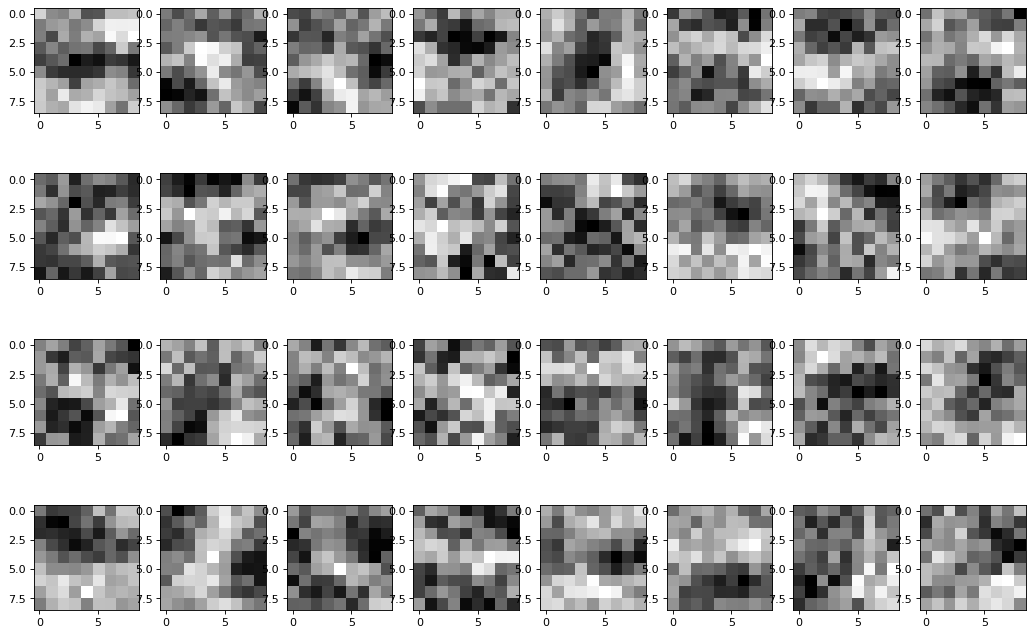

In [26]:
filters = model.layers[0].get_weights()[0][:,:,0,:]
fig=plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')

for i in range(1, 33):
    plt.subplot(6,8,i)
    plt.imshow(filters[:,:,i-1], interpolation="nearest", cmap="gray")

plt.show()

<strong style="color: blue">Lösung:</strong>

Hier kann man die Gewichte der Filter erkennen. Es kann darüber diskutiert werden, wofür die Filter zuständig sind. Falls nichts zu erkennen ist, kann diese Aufgabe auch übersprungen werden.

## Apply Model

In [31]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
<button onclick="classify_digit()">Classify</button>
</td>
</table>
"""

javascript = '''
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0;
    var click = 0;

    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2);
            y = Math.floor(e.offsetX * 0.2) + 1;
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1;
                    }
                }
            }
        } else {
            if (click == 1) set_value();
            click = 0;
        }
    });
    
    function set_value(){
        var result = "";
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ",";
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0;
    }
    
    function classify_digit() {
        IPython.notebook.execute_cells([IPython.notebook.get_selected_index()+1])
    }
</script>
'''

from IPython.display import HTML
HTML(input_form + javascript)

/home/dario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


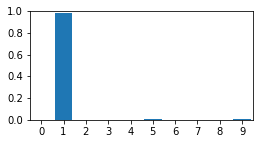

In [34]:
img_array = np.array(image)
img_array = img_array.reshape(1, 28, 28, 1)
predictions = model.predict(img_array)

%matplotlib inline 
fig = plt.figure(figsize=(4,2))
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks(range(10))
subplot.set_xlim(-0.5,9.5)
subplot.set_ylim(0,1)
subplot.bar(range(10), predictions[0], align='center')
fig.show()

Anmerkung: Damit dieses Zeichentool funktioniert, muss der Code mit dem Convolutional Neural Network ausgeführt worden sein.

# Hausübung

Bei der Abgabe der Übungen ist folgendes zu beachten:

<ul>
    <li> Abgaben sollten immer als Gruppe eingereicht werden. <b>Einzelabgaben werden nicht bewertet.</b> </li>
    <li> Die Abgabe hat in Form eines Jupyter Notebooks zu erfolgen. Wenn Sie mehrere Dokumente abgeben wollen (z.B. zusätzliche Bilder), sollten diese als Zip-Datei abgegeben werden. </li>
</ul>

<div class="task_description">
    <i class="task">Homework 9.1:</i>
        ::: 10 Hausaufgabenpunkte :::</div>

Ihre Aufgabe ist es, ein Modell (MLP) zu entwickeln, das besser funktioniert als das Basismodell. Verschiedene Ideen
die Sie ausprobieren können:
* Verändern Sie die Netzwerkstruktur, z.B. die Anzahl der Knoten im Hidden Layer und/oder die Anzahl der Hidden Layers.
* Verändern Sie die Werte der Hyperparameter, z.B. die Learning Rate.
* Ändern Sie die Trainingsparameter, z.B. die Anzahl der Epochen.
* Generieren Sie zusätzliche Trainingsdaten.
* Recherchieren Sie, welche Modelle für dieses Problem besonders gut funktionieren.
<br>
Beachten Sie, dass Sie die Testdaten nicht kennen und daher die Gefahr besteht, dass Sie ihr Modell zu sehr an die Trainingsdaten fitten.
<br>
<br>
Bitte geben Sie folgende Ergebnisse ab:
<br>
* Ein Jupyter Notebook mit ihrem Code
* Eine Beschreibung der von Ihnen eingereichten Konfiguration (auch im Notebook): 
    * Welche Netzwerkstruktur und welche Hyperparameter haben Sie verwendet? 
    * Welche weiteren Veränderungen haben Sie vorgenommen? Warum halten Sie Ihre Konfiguration für am besten geeignet? 
    * Welche Varianten haben Sie verworfen?
* Eine kurze Diskussion der zu erwartenden Klassifikationsqualität und wie Sie diese bestimmt haben(auch im Notebook).

Die volle Punktzahl für die Hausaufgabe ist unabhängig vom Abschneiden in der Challenge. Grundlage für die Bewertung ist allein die sinnvolle Diskussion Ihres Beitrags.

------------------------------------------------------------------------

*Your task is to develop a model that works better than the basic model. Different ideas that you can try out:*
* *Change the network structure, e.g. the number of nodes in the hidden layer and/or the number of hidden layers.*
* *Change the values of the hyper parameters, such as the learning rate.*
* *Change the course parameters, for example, the number of epochs.*
* *Generate additional course data.*
* *Find out which models work best for this problem.*
<br>

*Note that you do not know the test data and that there is therefore a danger that you fit your model too closely to the training data.*
<br>
<br>
*Please submit the following results:*<br>
* *A Jupyter Notebook with your code*
* *A description of the configuration you submitted (also in notebook):*
    * *Which network structure and which hyper parameters did you use?*
    * *What other changes have you made? Why do you think your configuration is best?*
    * *Which variants did you reject?*
* *A brief discussion of the expected classification quality and how you determined it(also in notebook).*

*The full score for the homework is independent of the results in the challenge. The only basis for the evaluation is the meaningful discussion of your contribution.*

<div class="task_description">
    <i class="task">Homework 9.2:</i>
        ::: 1 Extra-Klausurbonuspunkt ::: </div> 
Ein Extra-Klausurbonuspunkt wird an die 5 bestplazierten Teams vergeben. Die Endergebnisse werden in der Vorlesung präsentiert.


*An extra bonus point will be awarded to the 5 best placed teams. The final results will be presented in the lecture.*

### Code for Homework

In [ ]:
import keras
import matplotlib.pyplot as plt

import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential

from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
num_classes = 10
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

# print first 5 labels as categorial and one-hot
for i in range(5):
    print(y_train[i], " -> ", y_train_one_hot[i])
    
# Flatten the images as we are not using CNN here
img_rows, img_cols = 28, 28
image_size = img_rows * img_cols

batch_size = 128
epochs = 10

# normalize into [0,1]
def normalize_data(x):
    x = x.astype('float32')
    x /= 255
    return x

In [ ]:
%matplotlib inline 
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train[randint(0, x_train.shape[0])], cmap='Greys')
    
plt.show()

In [ ]:
def fit_model(model, xtrain, ytrain):
    history = model.fit(xtrain, ytrain,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=True,
                        validation_split=.1)
    return history
    
def evaluate_model(model, history, xtest, ytest):


    score = model.evaluate(xtest, ytest, verbose=False)

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
 
    print("Test loss: ", score[0])
    print("Test accuracy: ", score[1])

In [ ]:
print("Original shape: ", x_train.shape)
x_train_reshaped = x_train.reshape(x_train.shape[0], image_size)
x_test_reshaped = x_test.reshape(x_test.shape[0], image_size)
print("After flattening: ", x_train_reshaped.shape)

x_train_reshaped = normalize_data(x_train_reshaped)
x_test_reshaped = normalize_data(x_test_reshaped)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(image_size,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = fit_model(model, x_train_reshaped, y_train_one_hot)
evaluate_model(model, history, x_test_reshaped, y_test_one_hot)